<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Neuroscience of Learning, Memory, Cognition <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 <br>
<font color=696880 size=4>

*TA: Matin Arman Mehr* <br>
*Email: matinarmanmehr@proton.me* <br>

***If you have any issues or questions, please feel free to email me or send your messages in the Telegram group.***

# Student Information
Fill the desired information here

In [1]:
Student_Name = "AmirMahdi Daraei"
Student_ID = "99105431"

print("Student_Name:",Student_Name)
print("Student_ID:",Student_ID)

Student_Name: AmirMahdi Daraei
Student_ID: 99105431


# Introduction
Local Field Potential (LFP) signals possess the capability to provide us with highly valuable and detailed insights into the functioning of the brain. In this practice, we will undertake the analysis of the LFP signal derived from the brain of an anesthetized rat during an olfactory task. <br>
The LFP signal that is given to you comprises three distinct channels: <br>

&emsp;  1. Hippocampus (HPC) <br>
&emsp;  2. Olfactory Tubercle (OT) <br>
&emsp;  3. Medial Prefrontal Cortex (mPFC) <br>

Throughout the task, the anesthetized rat was exposed to two different odorants: <br>

&emsp;  1. Banana (tag = "20") <br>
&emsp;  2. Lime (tag = "40") <br>

Each odorant was presented with an equal probability of 50%. This implies that 50% of the time, the rat was exposed to the banana odor, and the remaining 50% to the lime odor. Upon cessation of odorant release, the resting state (tag = "10") commenced, devoid of any odor stimuli. <br>

**Note that the 4th channel is digitalByte which contains the events tags [10,20,40] in time.**

`Theorical Question 1:` Investigate the functions of the LFP channels (HPC, OT, mPFC) in rats brain and write a paragraph for each of them. (**Note: Academic references must be used**). *`5 Points`* <br>

The following is a brief synthesis of the book Principles of Neural Science by Kandel, which elucidates the crucial role of the hippocampus (HPC), olfactory tubercle (OT), and medial prefrontal cortex (mPFC) in olfactory processing, memory formation, and cognitive functions. 

* The HPC, an essential brain structure for spatial navigation and memory consolidation, plays a central role in learning and processing new information. The coordinated activity of large populations of neurons is reflected in local field potential (LFP) signals, which exhibit distinct patterns during different behavioral states. During memory encoding, theta oscillations (4-12 Hz) are prominent in the HPC and are associated with spatial navigation and the formation of episodic memories. Furthermore, sharp-wave ripple complexes (SWRs), high-frequency bursts (100-200 Hz), facilitate memory consolidation during rest periods by replaying neural sequences associated with recent experiences.

* The OT, which is part of the limbic system and closely connected to the olfactory bulb, is involved in processing olfactory information, reward-related learning, and emotional responses. LFP signals in the OT may reflect odor processing and discrimination, as well as emotional and cognitive processes. During odor presentation, gamma oscillations (30-80 Hz) may synchronize neural activity related to odor perception and discrimination. The OT interacts with other brain regions, like the prefrontal cortex and amygdala, to integrate olfactory information with emotional and cognitive processes.

* The mPFC, a structure involved in higher-order cognition, plays a critical role in executive functions, decision-making, and emotional regulation. The LFP signals in the mPFC exhibit diverse patterns depending on the task context. Persistent activity in the theta range (4-8 Hz) is observed during working memory tasks, while beta oscillations (13-30 Hz) are associated with attentional control and cognitive flexibility. They modulate the balance between exploration and exploitation during decision-making. The mPFC also communicates bidirectionally with other brain regions, including the HPC and OT, to enable the integration of sensory information, memory, and emotional states.

In summary, the coordinated activity of the HPC, OT, and mPFC, as reflected in LFP signals, provides valuable insights into neural dynamics during olfactory processing, memory formation, and cognitive functions. The complex interactions between these brain regions contribute to the intricate orchestration of brain networks and behavior. The understanding of these brain structures' functions is important for understanding the brain's functioning and developing treatments for various neurological disorders.

# Import Libraries

In [2]:
%pip install pymatreader
%matplotlib inline

from tqdm import tqdm
import pymatreader
import numpy as np
import scipy as sp
import pandas as pd
import math
import gc
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

Note: you may need to restart the kernel to use updated packages.


# Reading the Data
Import the `data.mat` file that is given to you by using pymatreader library. Add all of the dataset information into the *`data`* dict file. *`5 Points`* 

In [3]:
data = pymatreader.read_mat('/kaggle/input/dataset/data.mat')
data['HPC'] = data["channelData"][:,0]  
data['OT'] = data["channelData"][:,1]    
data['mPFC'] = data["channelData"][:,2]  
data['digital_byte'] = data["channelData"][:,3]
del data['__header__'], data['__version__'], data['__globals__'] 
data['srate'] = 2000                            # Sampling rate
data['channel_names'] = ['HPC','OT','mPFC']     # The name of each channel
data['events'] = ['rest','banana','lime']       # Events names
data['tags'] = [10,20,40]                       # Tag of each event
for k, v in data.items():
    print(f'{k}:\n{v}\n')

channelData:
[[ 0.0649724  -0.05617809 -0.01830673 10.        ]
 [-0.0185504  -0.04435825 -0.04335308 10.        ]
 [-0.01563835 -0.04778194 -0.04368734 10.        ]
 ...
 [-0.04810047  0.11319828  0.14291191  0.        ]
 [-0.05187416  0.12511444  0.14655066  0.        ]
 [-0.05227709  0.13679028  0.15188503  0.        ]]

HPC:
[ 0.0649724  -0.0185504  -0.01563835 ... -0.04810047 -0.05187416
 -0.05227709]

OT:
[-0.05617809 -0.04435825 -0.04778194 ...  0.11319828  0.12511444
  0.13679028]

mPFC:
[-0.01830673 -0.04335308 -0.04368734 ...  0.14291191  0.14655066
  0.15188503]

digital_byte:
[10. 10. 10. ...  0.  0.  0.]

srate:
2000

channel_names:
['HPC', 'OT', 'mPFC']

events:
['rest', 'banana', 'lime']

tags:
[10, 20, 40]



# Plot the raw LFP
Let's plot the first `2.5s` of each channels' signal! *`3 Points`*

In [ ]:
first_2p5s_data = np.array(data['channelData'][:int(2.5 * data['srate'])])

df = pd.DataFrame(first_2p5s_data, columns=data['channel_names'] + ['Tag'])
df['Time'] = np.arange(int(2.5 * data['srate'])) / data['srate']

tag_colors = {0: 'red', 8: 'purple', 10: 'blue', 20: 'yellow', 40: 'green', 255: 'black'}

fig, axes = plt.subplots(3, 1, figsize=(30, 15), sharex=True)
for i, channel in enumerate(data['channel_names']):
    ax = axes[i]
    for tag, color in tag_colors.items():
        mask = df['Tag'] == tag
        ax.plot(df['Time'][mask], df[channel][mask], '.', color=color, label=f'Tag {tag}')

    ax.set_title(f'Signal of {channel}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.legend()

plt.show()

# Power Spectrum Density (PSD)
Calculate and plot the power spectrum density for the frequency range up to 40Hz in each channel of the raw LFP signals. You can employ a simple FFT for this task. *`5 Points`*

In [ ]:
def calc_PSD(data, srate):
    """
    Calculate the Power Spectral Density (PSD) using Fast Fourier Transform (FFT).

    Parameters:
    - data: Array of signal data.
    - srate: Sampling rate.

    Returns:
    - freqs: Frequencies for the PSD.
    - psd: Power values at each frequency.
    """
    n = len(data)
    xdft = np.fft.fft(data)
    xdft = xdft[:n//2 + 1]
    psdx = (1 / (srate * n)) * (np.abs(xdft) ** 2)
    # Multiply by 2 to account for the symmetry of FFT 
    psdx[1:-1] = 2 * psdx[1:-1]

    freqs = np.linspace(0, srate / 2, len(psdx))

    pos_mask = (freqs > 0) & (freqs <= 40)
    freqs = freqs[pos_mask]
    psd = psdx[pos_mask]
    psd /= 1000
    return freqs, psd

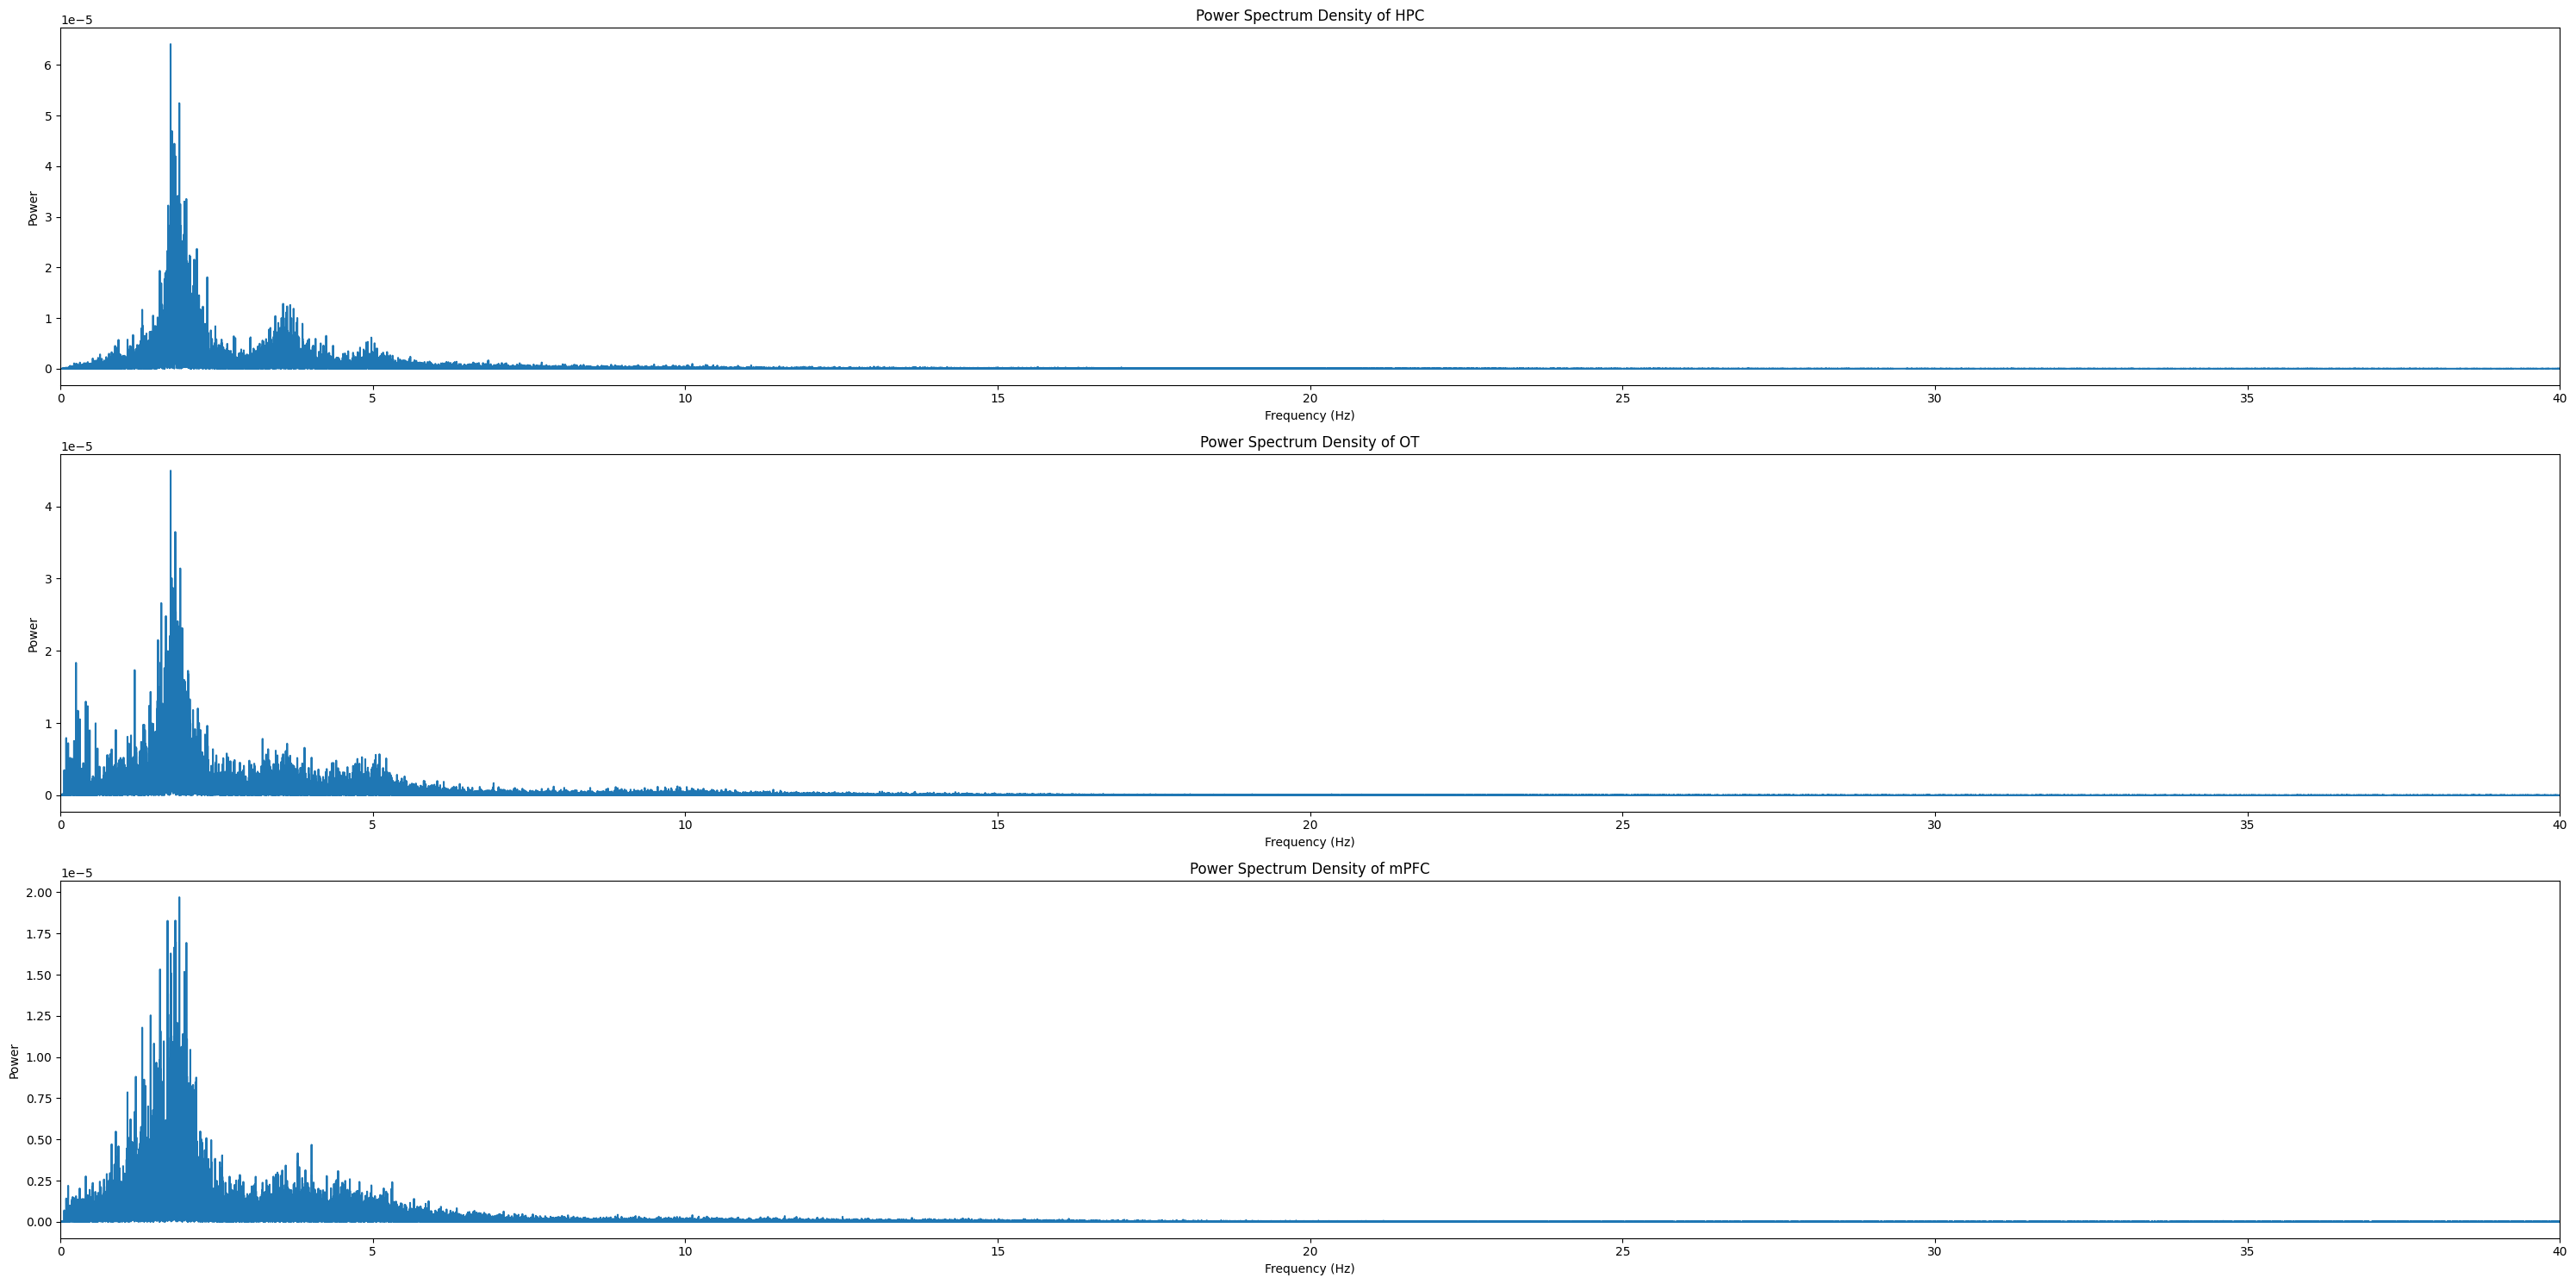

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(30, 15))

for i, channel in enumerate(data['channel_names']):
    freqs, psd = calc_PSD(data['channelData'][:, i], data['srate']) 
    axes[i].plot(freqs, psd)
    axes[i].set_title(f'Power Spectrum Density of {channel}')
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Power')
    axes[i].set_xlim([0, 40])

plt.tight_layout()
plt.show()

Compute the average power of the theta band (4Hz-8Hz) for each channel and create a bar plot to display the results. *`2 Points`* <br>

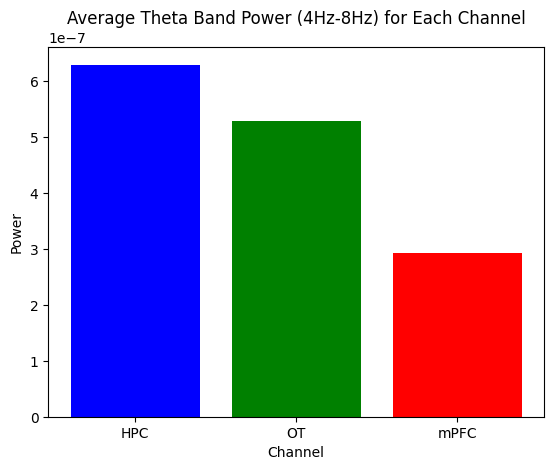

In [7]:
theta_powers = []
for channel_data in [data['HPC'], data['OT'], data['mPFC']]:
    freqs, psd = calc_PSD(channel_data, data['srate'])
    theta_powers.append(np.mean(psd[(freqs > 3) & (freqs <= 8)]))

fig, ax = plt.subplots()
colors = ['blue', 'green', 'red'] 
ax.bar(data['channel_names'], theta_powers, color=colors)
ax.set_title('Average Theta Band Power (4Hz-8Hz) for Each Channel')
ax.set_ylabel('Power')
ax.set_xlabel('Channel')
plt.show()

`Theorical Question 2:` Why is the theta power is higher in the hippocampus compared to other regions? Do a little research :D *`3 Points`*

The hippocampus is an essential component of the brain, responsible for memory and spatial navigation. It displays a higher level of theta wave activity (4-8 Hz) than other regions due to its specialized structure and functions. Specific neurons and circuits work in harmony to create theta rhythms that aid in linking and processing cognitive and spatial information during activities such as movement and exploration. The hippocampus plays a critical role in creating a cognitive map of one's surroundings and aiding in memory processing. Ultimately, the hippocampus's unique neuronal composition and connectivity enable it to support these critical cognitive functions through increased theta power.

# Preprocessing
First thing first, filter each channel between 0.5Hz-128Hz. *`3 Points`* <br>
**Note: Use zero-phase filter to maintain the time features of the signals after filtering.**

In [8]:
# if needed!
def downsample_data(data, down_factor):
    """
    Downsamples the provided data by the specified factor.

    Parameters:
    - data: The original data array.
    - down_factor: The factor by which to reduce the data rate.

    Returns:
    - Downsampled data array.
    """
    return data[::down_factor]

In [9]:
downsample_factor = 4
data['channelData'] = downsample_data(np.array(data['channelData']), downsample_factor)
data['HPC'] = data["channelData"][:,0]  
data['OT'] = data["channelData"][:,1]    
data['mPFC'] = data["channelData"][:,2]  
data['digital_byte'] = data["channelData"][:,3]
data['srate'] = data['srate'] // downsample_factor
print(data['srate'])

500


In [10]:
def BPF_filter(data, frq_low, frq_high, srate, filt_order):
    """
    Applies a zero-phase bandpass filter to the data.

    Parameters:
    - data: Signal data.
    - frq_low: Lower frequency bound of the filter.
    - frq_high: Higher frequency bound of the filter.
    - srate: Sampling rate of the data.
    - filt_order: Order of the filter.

    Returns:
    - Filtered data.
    """
    nyq = 0.5 * srate
    low = frq_low / nyq
    high = frq_high / nyq
    b, a = sp.signal.butter(filt_order, [low, high], btype='band')
    filtered_data = sp.signal.filtfilt(b, a, data)
    return filtered_data

In [11]:
for channel in data['channel_names']:
    data[channel] = BPF_filter(data[channel], 0.5, 128, data['srate'], 3)

Next, epoch the data according to each event (banana and lime) as you've done at the previous practice. Each trial must contain `1.5` seconds before and `3` seconds after the onset of each stimulus. Consider computing zscore of time series in each trial. *`3 Points`*

In [12]:
def epoch_data(data, tag, time_interval):
    """
    Extract epochs from LFP data based on digital byte markers and specific tags.

    Parameters:
    - data: Dictionary containing all necessary data and metadata.
    - tag: The tag identifying the onset of the event of interest.
    - time_interval: Tuple or list indicating the start and end times relative to the event.

    Returns:
    - A dictionary with epoched data and related metadata.
    """

    event_indices = np.where(np.diff(data['digital_byte']) > 0)[0] + 1
    epoch_indices = [idx for idx in event_indices if data['digital_byte'][idx] == tag]
    sample_interval = np.array(time_interval) * data['srate']
    sample_interval[1] -= 1
    num_samples = int(sample_interval[1] - sample_interval[0] + 1)

    epoched_data = {
        'srate': data['srate'],
        'num_channels': len(data['channel_names']),
        'num_trials': len(epoch_indices),
        'time': np.linspace(time_interval[0], time_interval[1], num_samples, endpoint=False),
        'data': np.zeros((len(data['channel_names']), num_samples, len(epoch_indices)))
    }

    for trial_idx, event_start in tqdm(enumerate(epoch_indices), total=len(epoch_indices), desc="Extracting Epochs"):
        start_idx = int(event_start + sample_interval[0])
        end_idx = int(event_start + sample_interval[1] + 1)
        for ch_idx, ch_name in enumerate(data['channel_names']):
            epoched_data['data'][ch_idx, :, trial_idx] = data[f'{ch_name}'][start_idx:end_idx]
    epoched_data['data'] = np.apply_along_axis(sp.stats.zscore, 1, epoched_data['data'])

    return epoched_data

In [13]:
epochs = {'banana': epoch_data(data, data['tags'][1], [-1.5, 3]), 'lime': epoch_data(data, data['tags'][2], [-1.5, 3])}

Extracting Epochs: 100%|██████████| 26/26 [00:00<00:00, 19691.57it/s]


# Event-Related Potential (ERP)
Compute the Event-Related Potential (ERP) for each channel and event in all channels as you've done at the previous practice. Plot them for each event. *`5 Points`* <br>
 **Note: Consider using baseline rejection: ERP_signal - mean(ERP_signal(before stimulus))**

In [14]:
def calc_ERP(data):
    """
    Calculate the Event-Related Potential (ERP) from multi-trial EEG data.

    Parameters:
    - data (dict): A dictionary containing the EEG data and related information
                   
    Returns:
    - A 2D numpy array containing the ERP for each channel, averaged across trials.
              The dimensions of the array are [channels, time_points]. The baseline correction
              is applied by subtracting the mean voltage in a pre-defined baseline period
              (here, 1.5 seconds before the zero time-point) from each time point.
    
    The function computes the mean across trials for each channel at each time point, then applies
    baseline correction by subtracting the mean voltage of the pre-stimulus period from each time point.
    """
    erp = np.mean(data['data'], axis=2)
    erp -= np.mean(erp[:, :int(-1.5 * data['srate'])], axis=1, keepdims=True)
    return erp


In [15]:
erps = {'banana': calc_ERP(epochs['banana']), 'lime': calc_ERP(epochs['lime'])} 

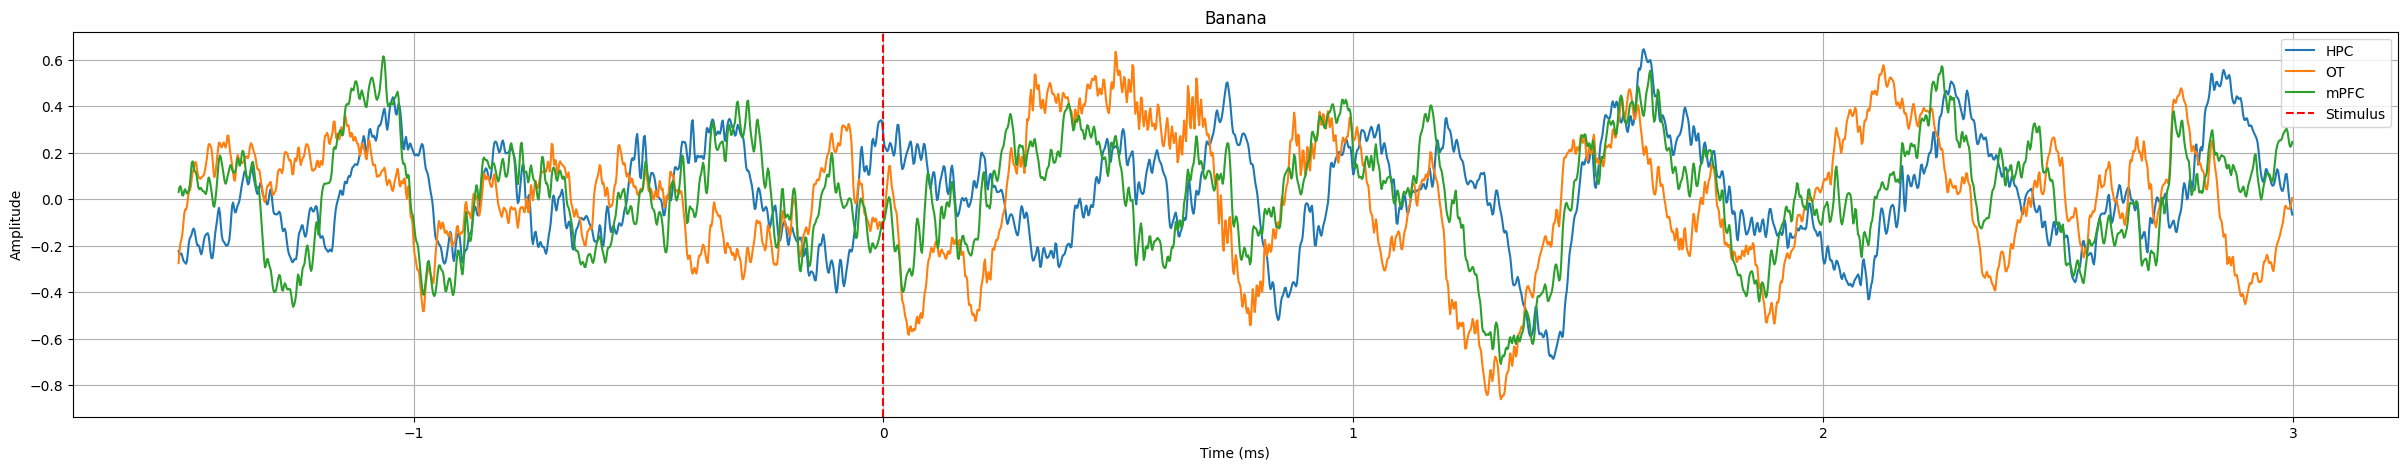

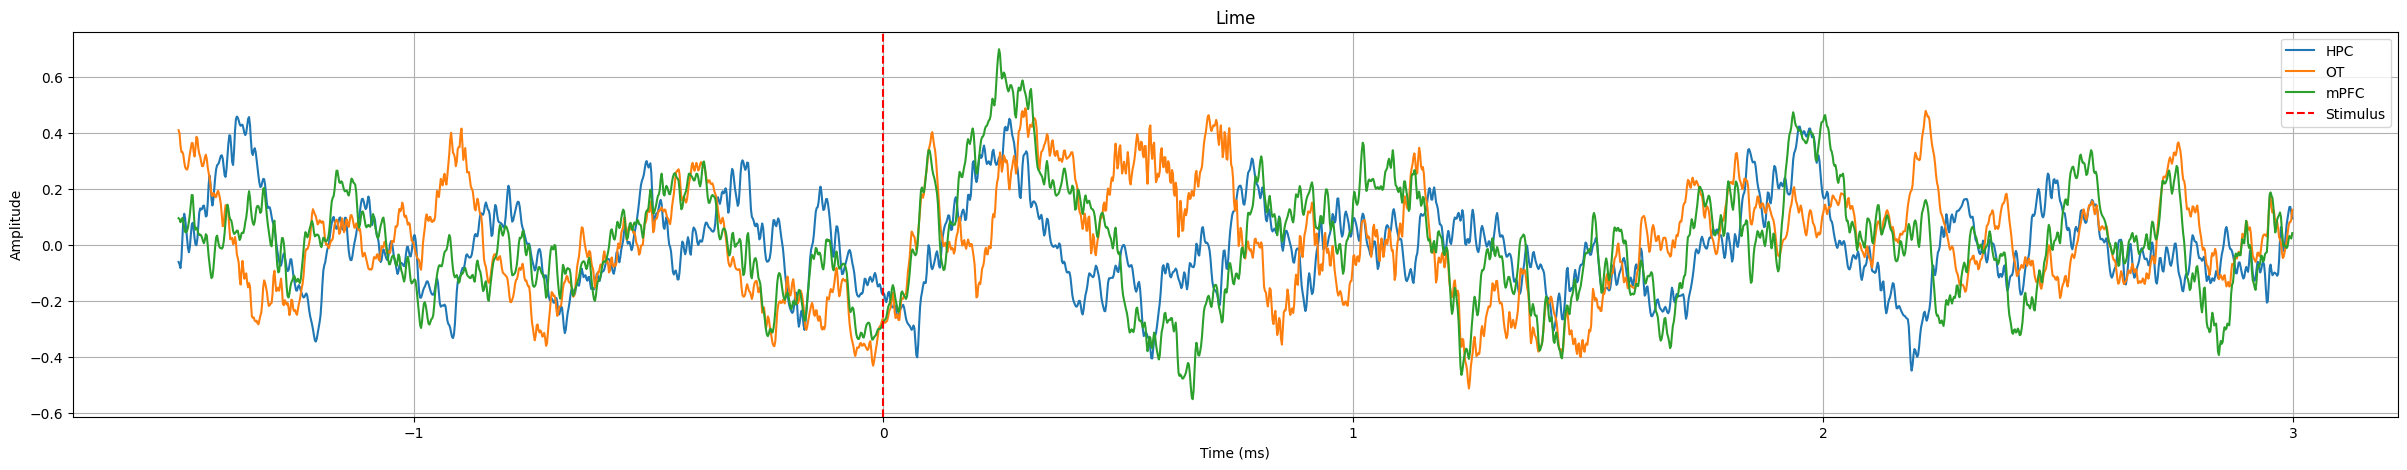

In [16]:
plt.figure(figsize=(30, 5))
for i, channel in enumerate(data['channel_names']):
    plt.plot(epochs['banana']['time'], erps['banana'][i, :], label=channel)

plt.axvline(0, color='red', linestyle='--', label='Stimulus')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Banana')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(30, 5))
for i, channel in enumerate(data['channel_names']):
    plt.plot(epochs['lime']['time'], erps['lime'][i, :], label=channel)

plt.axvline(0, color='red', linestyle='--', label='Stimulus')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Lime')
plt.legend()
plt.grid(True)
plt.show()

# Phase-Lock Value (PLV)

In the previous practice, you studied the phase-lock value as a method for evaluation of functional connectivity between different parts of brain. Now, we aim to implement it for the olfactory task and investigate the effect of odorants on the connections between channels. You can use [this paper](https://doi.org/10.1016%2Fj.neuroimage.2013.02.008) for more help. <br>

Compute the phase-lock value between different channels for `1.5sec` before and `1.5sec` after the onset of the stimulus for each trials across a frequency range of `20Hz-60Hz` for both odorants. Next, determine the mean and standard error of the calculated phase-lock values across trials. At the end, create a plot showing the bounded lines for phase-lock values at various frequencies. Compare the results before and after stimulus. *`20 Points`*

In [17]:
def calc_PLV(data, first_channel_idx, second_channel_idx, freq_range):
    """
    Compute the Phase Locking Value (PLV) between two channels for each frequency in a specified range.
    
    Parameters:
    - data: Dictionary containing the epoch data, number of trials, and sampling rate.
    - first_channel_idx: Index of the first channel.
    - second_channel_idx: Index of the second channel.
    - freq_range: List or array of frequencies to compute the PLV for.
    
    Returns:
    - Mean PLV across frequencies and trials.
    - Standard error of the mean PLV across frequencies and trials.
    """
    plv_values = []
    for trial in range(data['num_trials']):
        trial_plvs = []
        for freq in freq_range:
            band = [freq - 5, freq + 5]
            b, a = sp.signal.butter(4, band, btype='bandpass', fs=data['srate'])  
            filtered_ch1 = sp.signal.filtfilt(b, a, data['data'][first_channel_idx, :, trial])
            filtered_ch2 = sp.signal.filtfilt(b, a, data['data'][second_channel_idx, :, trial])
            phase_ch1 = np.angle(sp.signal.hilbert(filtered_ch1))  
            phase_ch2 = np.angle(sp.signal.hilbert(filtered_ch2))  
            
            plv = np.abs(np.mean(np.exp(1j * (phase_ch1 - phase_ch2))))  
            trial_plvs.append(plv)  
        
        plv_values.append(np.mean(trial_plvs))  
    
    mean_plv = np.mean(plv_values)  
    sem_plv = np.std(plv_values) / np.sqrt(len(plv_values)) 
    
    return mean_plv, sem_plv

In [18]:
epochs = {
    'banana': {'before': epoch_data(data, data['tags'][1], [-1.5, 0]), 'after': epoch_data(data, data['tags'][1], [0, 1.5])} ,
    'lime': {'before': epoch_data(data, data['tags'][2], [-1.5, 0]), 'after': epoch_data(data, data['tags'][2], [0, 1.5])} 
}
freq_range = np.arange(20, 61)

Extracting Epochs: 100%|██████████| 26/26 [00:00<00:00, 36338.52it/s]


In [19]:
def apply_PLV(epochs_data, freq_range):
    plv_stats = {
        'before': {'means': [], 'sems': []},
        'after': {'means': [], 'sems': []}
    }
    for freq in tqdm(freq_range, desc="Calculating PLV across freqs"):
        for period in ['before', 'after']:
            mean_plv, sem_plv = calc_PLV(epochs_data[period], 0, 1, [freq])
            plv_stats[period]['means'].append(mean_plv)
            plv_stats[period]['sems'].append(sem_plv)
    return plv_stats

plv_stats_banana = apply_PLV(epochs['banana'], freq_range)
plv_stats_lime = apply_PLV(epochs['lime'], freq_range)

Calculating PLV across freqs: 100%|██████████| 41/41 [00:01<00:00, 21.26it/s]


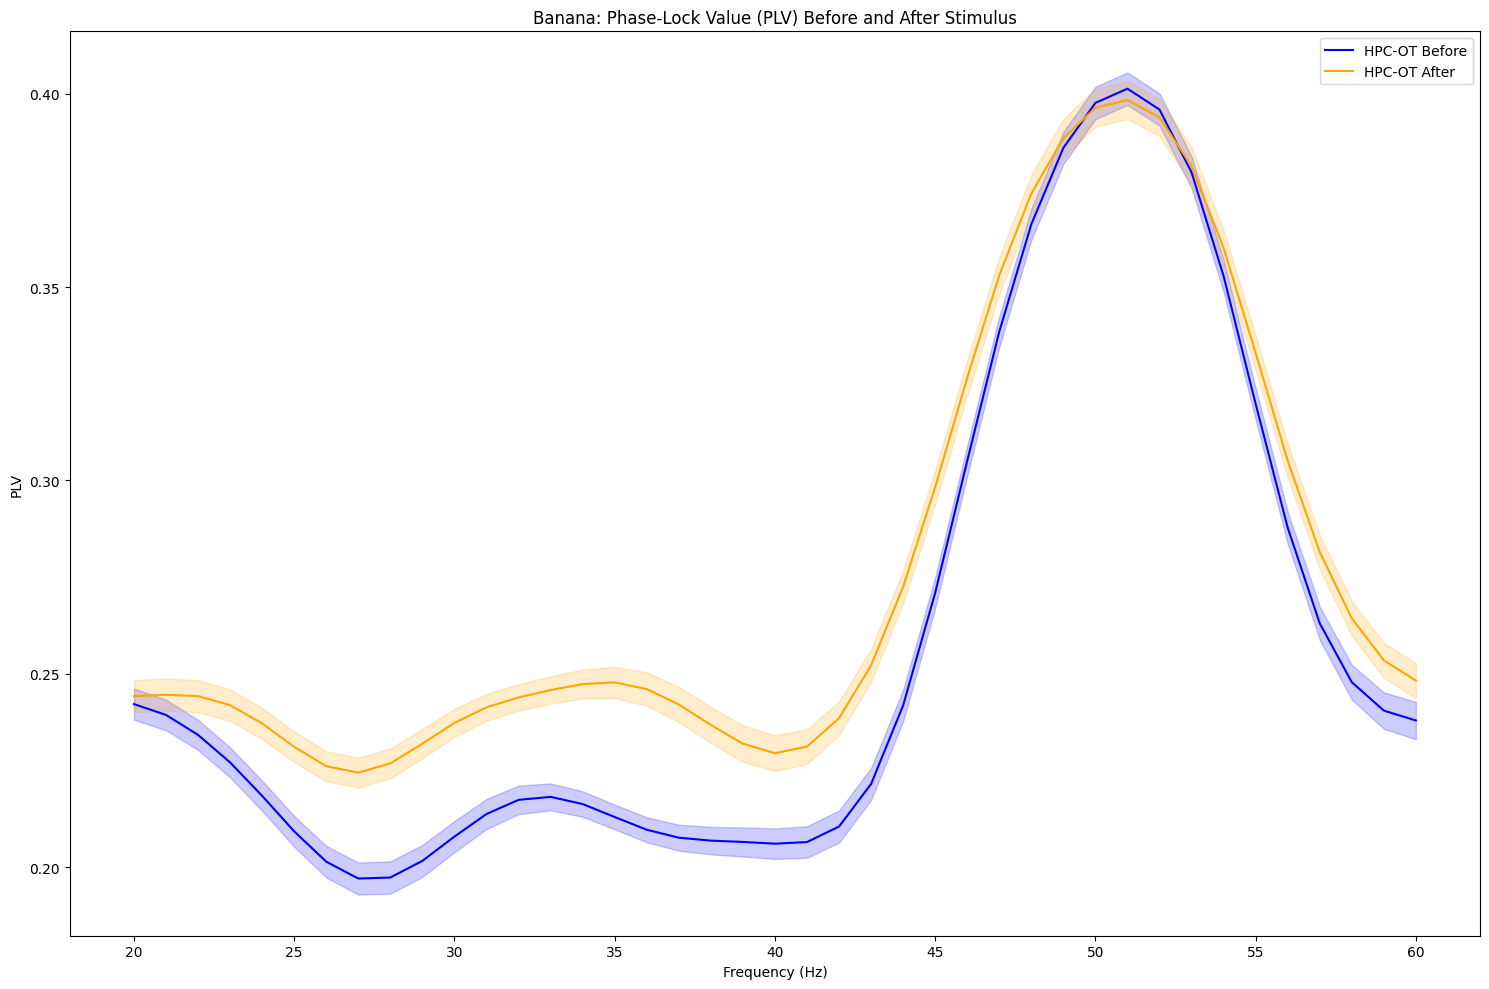

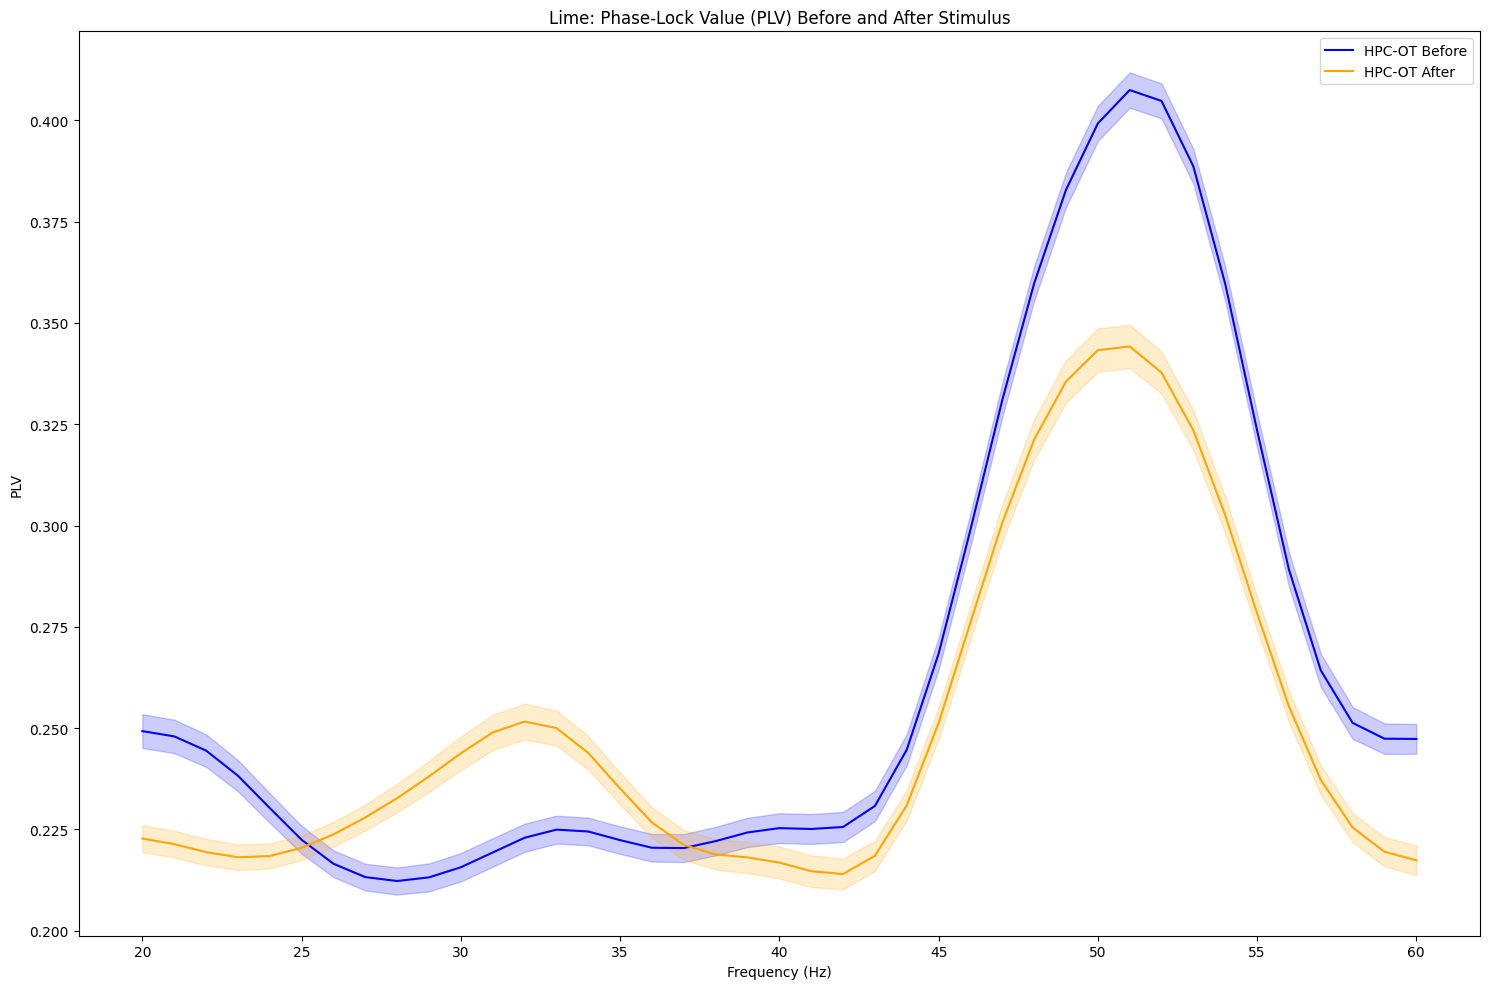

In [20]:
def smooth_data(means, sems, sigma=2):
    smoothed_means = sp.ndimage.gaussian_filter1d(means, sigma=sigma)
    smoothed_sems = sp.ndimage.gaussian_filter1d(sems, sigma=sigma)
    return smoothed_means, smoothed_sems

# Plotting for Banana
plt.figure(figsize=(15, 10))
means_before_banana, sems_before_banana = smooth_data(np.array(plv_stats_banana['before']['means']), np.array(plv_stats_banana['before']['sems']))
means_after_banana, sems_after_banana = smooth_data(np.array(plv_stats_banana['after']['means']), np.array(plv_stats_banana['after']['sems']))

plt.plot(freq_range, means_before_banana, label='HPC-OT Before', color='blue')
plt.fill_between(freq_range, means_before_banana - sems_before_banana / 6, means_before_banana + sems_before_banana / 6, color='blue', alpha=0.2)
plt.plot(freq_range, means_after_banana, label='HPC-OT After', color='orange')
plt.fill_between(freq_range, means_after_banana - sems_after_banana / 6, means_after_banana + sems_after_banana / 6, color='orange', alpha=0.2)

plt.title('Banana: Phase-Lock Value (PLV) Before and After Stimulus')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PLV')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting for Lime
plt.figure(figsize=(15, 10))
means_before_lime, sems_before_lime = smooth_data(np.array(plv_stats_lime['before']['means']), np.array(plv_stats_lime['before']['sems']))
means_after_lime, sems_after_lime = smooth_data(np.array(plv_stats_lime['after']['means']), np.array(plv_stats_lime['after']['sems']))

plt.plot(freq_range, means_before_lime, label='HPC-OT Before', color='blue')
plt.fill_between(freq_range, means_before_lime - sems_before_lime / 6, means_before_lime + sems_before_lime / 6, color='blue', alpha=0.2)
plt.plot(freq_range, means_after_lime, label='HPC-OT After', color='orange')
plt.fill_between(freq_range, means_after_lime - sems_after_lime / 6, means_after_lime + sems_after_lime / 6, color='orange', alpha=0.2)

plt.title('Lime: Phase-Lock Value (PLV) Before and After Stimulus')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PLV')
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
# call garbage collector to free space in memory 
gc.collect()

12789

# Phase-Amplitude Coupling (PAC)

One of the recent methods used for studying functional connectivity is Phase-Amplitude Coupling (PAC). This method is widely used to explain the way of communication among various neural populations in the brain. For more detailed information on PAC and how it's calculated, you can refer to [this paper](https://doi.org/10.1038/s41598-019-48870-2). Moreover, [this paper](https://doi.org/10.1038/s41598-019-43272-w) has also explained how different neural networks communicate through their theta and gamma oscillations to transfer information.

`Theorical Question 3:` Read both papers and explain the process of calculating PAC and how we infer PAC as a metric for communication between different neural oscillations. `5 Points`

**Note: You don't have to read both papers in detail; just simply collect the information you NEED :D**

The field of neuroscience utilizes a sophisticated method known as phase-amplitude coupling (PAC) to investigate the communication between various regions of the brain through rhythmic activity. This technique involves measuring the synchronization between the amplitude of fast brain waves and the phase of slower ones across different brain regions. PAC is a particularly useful metric as it provides insights into the direction of neural interactions, which cannot be obtained from more traditional measures such as coherence.

Recent studies have employed PAC to explore the transmission of signals between the hippocampus and prefrontal cortex, as well as within different parts of the hippocampus itself. By observing whether high-frequency activity in one region corresponds with specific phase points of lower-frequency waves in another region, researchers can confirm known anatomical connections and gain nuanced insights into the dynamic, rhythmic interplay that underlies cognitive functions, such as memory and attention. This helps us better understand brain functionality and has potential implications for addressing neurological disorders where these rhythms are disrupted.

To calculate PAC, researchers filter signals from the brain, known as Local Field Potentials (LFPs), into two groups: one for the slow wave's phase and another for the fast wave's amplitude. They then use a mathematical tool called the Hilbert Transform to capture the exact moment and intensity of these waves. By calculating the relationship between the slow wave's phase and the fast wave's amplitude, researchers can measure coupling and gain clues about how brain regions interact over time.

Now, we aim to analyze the data and compute the Phase-Amplitude Coupling (PAC) for each channel. First thing first, as explained in [the paper](https://doi.org/10.1038/s41598-019-48870-2) you've read, we need to find the Bilinear time–frequency distribution of the signal using the RID-Rihaczek method. The code for this is provided below:

In [22]:
## DON'T CHANGE THE CODES OF THIS BLOCK

def _rhu(n):
    '''
    Return integer rounded of the input. The half will round up.
    1.3 -> 1
    2.5 -> 3
    -0.5 -> 0
    -0.3 -> -1
    '''
    return int(math.floor(n + 0.5))


def _datawrap(x: np.ndarray, n: int) -> np.ndarray:
    '''
    The calculation of signal spectrum, such as periodogram, uses FFT internally, 
    where the length of FFT is denoted as NFFT. In theory, when using FFT, 
    the signal in both time domain and frequency domain are discrete and periodic, 
    where the period is given by NFFT. Hence, if you specify an NFFT that is less 
    than the signal length, it actually introduces the aliasing in the time domain 
    and make the signal (even if its length is N>NFFT) periodic with NFFT. 
    When you take FFT of this sequence, you are working with this aliased sequence. 
    This is what datawrap do for you. 

    For example: Sequence 1 2 3 4 5, period 5, it returns
        1 2 3 4 5
                  1 2 3 4 5
                            1 2 3 4 5
        --------------------------------
              ... 1 2 3 4 5 ...

    i.e., original series. assume a period of 3, then it looks like

        1 2 3 4 5
              1 2 3 4 5
                    1 2 3 4 5
        ------------------------
          ... 5 7 3 ...

    A sequence that is wrapped around and has only a length of 3.

    >>> _datawrap(range(1, 6),3)
    array([5, 7, 3])

    '''
    return np.array([sum(x[i::n]) for i in range(n)])


def _chwi_krn(D: np.ndarray, L: np.ndarray, A: int = None):
    '''

    CHWI_KRN Choi-Williams kernel function.

    https://en.wikipedia.org/wiki/Bilinear_time%E2%80%93frequency_distribution#Choi%E2%80%93Williams_distribution_function

    K = _chwi_krn(D, L, A) returns the values K of the Choi-Williams kernel function
    evaluated at the doppler-values in matrix D and the lag-values in matrix L.
    Matrices D and L must have the same size. The values in D should be in the range
    between -1 and +1 (with +1 being the Nyquist frequency). The parameter A is
    optional and controls the "diagonal bandwidth" of the kernel. Matrix K is of the
    same size as the matrices D and L. Parameter A defaults to 10 if omitted.

    Copyright (c) 1998 by Robert M. Nickel
    Revision: 1.1.1.1
    Date: 2001/03/05 09:09:36

    Written by: Mahdi Kiani, March 2021

    '''

    if A is None:
        A = 10
    K = np.exp((-1/(A*A)) * (D*D*L*L))

    return K

def rid_rihaczek(x: np.ndarray, fbins: int):
    '''
    Munia, T.T.K., Aviyente, S. Time-Frequency Based Phase-Amplitude
    Coupling Measure For Neuronal Oscillations. Sci Rep 9, 12441 (2019).
    https://doi.org/10.1038/s41598-019-48870-2

    This function computes reduced interference Rihaczek distribution

    Parameter:
        x: signal
        fbins=required frequency bins

    Returns:
        tfd = Generated reduced interference Rihaczek distribution

    Written by: Mahdi Kiani, March 2021
    '''

    tbins = x.shape[0]
    amb = np.zeros((tbins, tbins))
    for tau in range(tbins):
        amb[tau, :] = (np.conj(x) * np.concatenate((x[tau:], x[:tau])))

    ambTemp = np.concatenate(
        (amb[:, _rhu(tbins/2):], amb[:, :_rhu(tbins/2)]), axis=1)
    amb1 = np.concatenate(
        (ambTemp[_rhu(tbins/2):, :], ambTemp[:_rhu(tbins/2), :]), axis=0)

    D = np.outer(np.linspace(-1, 1, tbins), np.linspace(-1, 1, tbins), )
    K = _chwi_krn(D, D, 0.01)
    df = K[:amb1.shape[0], :amb1.shape[1]]
    ambf = amb1 * df

    A = np.zeros((fbins, tbins))
    tbins = tbins - 1

    if tbins != fbins:
        for tt in range(tbins):
            A[:, tt] = _datawrap(ambf[:, tt], fbins)
    else:
        A = ambf

    tfd = np.fft.fft(A, axis=0)

    return tfd

Next, compute the local Phase-Amplitude Coupling (l-PAC) within each channel and the inter-regional PAC (ir-PAC) across different channels for **ERP signals** Calculate these values for each phase and amplitude frequency within a time interval of `1sec` before and `1sec` after the onset of stimulation for both odorants. The phase frequency should be in the theta band `4Hz-8Hz`, and the amplitude frequency should be in the low gamma band `20Hz-60Hz`. Afterwards, plot the comodulograms ([f_phase, f_amplitude, PAC] plot) and compare the results before and after the stimulus. *`20 Points`* <br>

**Note: Ensure that the scale of PACs in plots is equalized before and after the stimulus to make them comparable.** 

In [23]:
def calc_MVL(phase, amp):
    """
    Calculate the Mean Vector Length (MVL) from phase and amplitude arrays.

    Parameters:
    - phase: An array of phase values, typically in radians.
    - amp: An array of corresponding amplitudes.

    Returns:
    - The calculated mean vector length, which is a measure of phase-locking strength.

    The function computes the vector strength of phase data weighted by corresponding amplitudes.
    It represents the consistency of phase across trials or time, weighted by the amplitude of those observations.
    """
    z = amp * np.exp(1j * phase)
    return np.abs(np.mean(z))

def tf_MVL(data, fph_range, famp_range, srate):
    """
    Calculate the Time-Frequency Mean Vector Length (MVL) for specific frequency ranges within a signal.

    Parameters:
    - x: The input signal from which time-frequency data is to be derived.
    - fph_range: The range (slice) of frequencies for which to extract the phase information.
    - famp_range: The range (slice) of frequencies for which to extract the amplitude information.
    - srate: The sampling rate of the signal.

    Returns:
    - The mean vector length calculated from specified phase and amplitude ranges.

    This function computes the MVL using the Rihaczek distribution. It uses the Rihaczek time-frequency distribution
    to extract phase and amplitude at specified frequency ranges. The MVL is then calculated to evaluate the
    phase-amplitude coupling or consistency within the specified frequency ranges.
    """
    tfd = rid_rihaczek(data, srate)  
    amp = np.abs(tfd[famp_range, :])  
    phase = np.angle(tfd[fph_range, :])
    return calc_MVL(phase, amp)

def calc_PAC(data, famp_range, fph_range, srate):
    """
    Calculate the time-frequency phase-amplitude coupling (PAC) for a given data and identify the frequency pair with the highest coupling.

    Parameters:
    - data: The segment of the signal for PAC analysis.
    - famp_range: List of high frequencies to analyze for amplitude.
    - fph_range: List of low frequencies to analyze for phase.
    - srate: Sampling frequency of the input signal.

    Returns:
    - A tuple containing:
        - pac_values: A 2D array of phase-amplitude coupling values across all high and low frequency pairs.
    """
    pac_values = np.zeros((len(famp_range), len(fph_range)))
    for low_index, low_freq in tqdm(enumerate(fph_range), total=len(fph_range), desc='Calculating PAC values across fph freqs'):
        for high_index, high_freq in enumerate(famp_range):
            pac_values[high_index, low_index] = tf_MVL(data, low_freq, high_freq, srate)
    return pac_values

In [24]:
low_gamma_band, theta_band = [20, 60], [4, 8]
famp_range = range(low_gamma_band[0], low_gamma_band[1] + 1, 1)
fph_range = range(theta_band[0], theta_band[1] + 1, 1)

pre_stimulus_erp = erps['banana'][0, 250:750]       # data of HPC channel 1 sec before stimulus (banana)
post_stimulus_erp = erps['banana'][0, 751:1251]     # data of HPC channel 1 sec after stimulus (banana)

hpc_pac_before_stimulus = calc_PAC(pre_stimulus_erp, famp_range, fph_range, data['srate'])
hpc_pac_after_stimulus = calc_PAC(post_stimulus_erp, famp_range, fph_range, data['srate'])
hpc_vmin = min(np.min(hpc_pac_before_stimulus), np.min(hpc_pac_after_stimulus))
hpc_vmax = max(np.max(hpc_pac_before_stimulus), np.max(hpc_pac_after_stimulus))

pre_stimulus_erp = erps['banana'][1, 250:750]       # data of OT channel 1 sec before stimulus (banana)
post_stimulus_erp = erps['banana'][1, 751:1251]     # data of OT channel 1 sec after stimulus (banana)

ot_pac_before_stimulus = calc_PAC(pre_stimulus_erp, famp_range, fph_range, data['srate'])
ot_pac_after_stimulus = calc_PAC(post_stimulus_erp, famp_range, fph_range, data['srate'])
ot_vmin = min(np.min(ot_pac_before_stimulus), np.min(ot_pac_after_stimulus))
ot_vmax = max(np.max(ot_pac_before_stimulus), np.max(ot_pac_after_stimulus))

pre_stimulus_erp = erps['banana'][2, 250:750]       # data of mPFC channel 1 sec before stimulus (banana)
post_stimulus_erp = erps['banana'][2, 751:1251]     # data of mPFC channel 1 sec after stimulus (banana)

mpfc_pac_before_stimulus = calc_PAC(pre_stimulus_erp, famp_range, fph_range, data['srate'])
mpfc_pac_after_stimulus = calc_PAC(post_stimulus_erp, famp_range, fph_range, data['srate'])
mpfc_vmin = min(np.min(mpfc_pac_before_stimulus), np.min(mpfc_pac_after_stimulus))
mpfc_vmax = max(np.max(mpfc_pac_before_stimulus), np.max(mpfc_pac_after_stimulus))

Calculating PAC values across fph freqs: 100%|██████████| 5/5 [01:08<00:00, 13.78s/it]


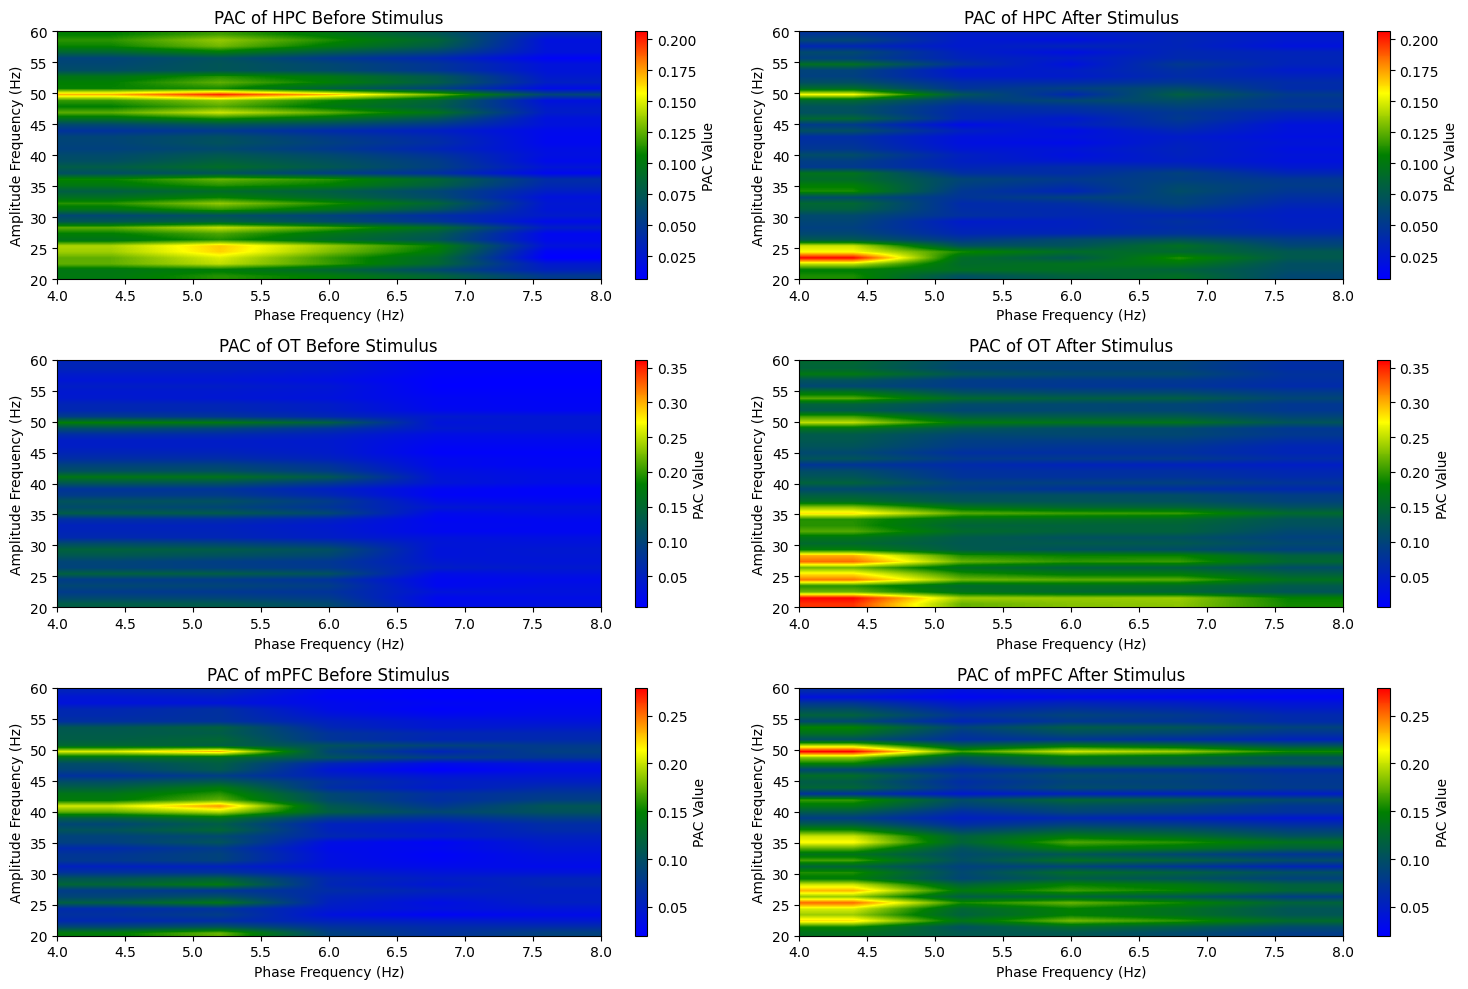

In [25]:
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_cmap",
    [(0, 'blue'), (0.5, 'green'), (0.75, 'yellow'), (1, 'red')]
)

plt.figure(figsize=(15, 10))

# PAC before stimulus (HPC)
plt.subplot(3, 2, 1)  
img = plt.imshow(hpc_pac_before_stimulus, origin='lower', aspect='auto',
                 extent=[theta_band[0], theta_band[1], low_gamma_band[0], low_gamma_band[1]],
                 vmin=hpc_vmin, vmax=hpc_vmax, cmap=cmap, interpolation='bilinear')
plt.colorbar(img, label='PAC Value')
plt.xlabel('Phase Frequency (Hz)')
plt.ylabel('Amplitude Frequency (Hz)')
plt.title('PAC of HPC Before Stimulus')

# PAC after stimulus (HPC)
plt.subplot(3, 2, 2)
img = plt.imshow(hpc_pac_after_stimulus, origin='lower', aspect='auto',
                 extent=[theta_band[0], theta_band[1], low_gamma_band[0], low_gamma_band[1]],
                 vmin=hpc_vmin, vmax=hpc_vmax, cmap=cmap, interpolation='bilinear')
plt.colorbar(img, label='PAC Value')
plt.xlabel('Phase Frequency (Hz)')
plt.ylabel('Amplitude Frequency (Hz)')
plt.title('PAC of HPC After Stimulus')

# PAC before stimulus (OT)
plt.subplot(3, 2, 3)
img = plt.imshow(ot_pac_before_stimulus, origin='lower', aspect='auto',
                 extent=[theta_band[0], theta_band[1], low_gamma_band[0], low_gamma_band[1]],
                 vmin=ot_vmin, vmax=ot_vmax, cmap=cmap, interpolation='bilinear')
plt.colorbar(img, label='PAC Value')
plt.xlabel('Phase Frequency (Hz)')
plt.ylabel('Amplitude Frequency (Hz)')
plt.title('PAC of OT Before Stimulus')

# PAC after stimulus (OT)
plt.subplot(3, 2, 4)
img = plt.imshow(ot_pac_after_stimulus, origin='lower', aspect='auto',
                 extent=[theta_band[0], theta_band[1], low_gamma_band[0], low_gamma_band[1]],
                 vmin=ot_vmin, vmax=ot_vmax, cmap=cmap, interpolation='bilinear')
plt.colorbar(img, label='PAC Value')
plt.xlabel('Phase Frequency (Hz)')
plt.ylabel('Amplitude Frequency (Hz)')
plt.title('PAC of OT After Stimulus')

# PAC before stimulus (mPFC)
plt.subplot(3, 2, 5)
img = plt.imshow(mpfc_pac_before_stimulus, origin='lower', aspect='auto',
                 extent=[theta_band[0], theta_band[1], low_gamma_band[0], low_gamma_band[1]],
                 vmin=mpfc_vmin, vmax=mpfc_vmax, cmap=cmap, interpolation='bilinear')
plt.colorbar(img, label='PAC Value')
plt.xlabel('Phase Frequency (Hz)')
plt.ylabel('Amplitude Frequency (Hz)')
plt.title('PAC of mPFC Before Stimulus')

# PAC after stimulus (mPFC)
plt.subplot(3, 2, 6)
img = plt.imshow(mpfc_pac_after_stimulus, origin='lower', aspect='auto',
                 extent=[theta_band[0], theta_band[1], low_gamma_band[0], low_gamma_band[1]],
                 vmin=mpfc_vmin, vmax=mpfc_vmax, cmap=cmap, interpolation='bilinear')
plt.colorbar(img, label='PAC Value')
plt.xlabel('Phase Frequency (Hz)')
plt.ylabel('Amplitude Frequency (Hz)')
plt.title('PAC of mPFC After Stimulus')

plt.tight_layout()
plt.show()

# Time-Varying Phase-Amplitude Coupling (tv-PAC)

In this section, we aim to analyze the dynamics of Phase-Amplitude Coupling (PAC) over time. This can be achieved using a sliding window technique. Set the window size to `0.25sec` and slide it with `75%` overlap across the ERP signals for each channel in both odorants. Within each window, calculate the PAC and then average it over the phase frequency range of theta band `4Hz-8Hz`. Finally, generate time-frequency plots for PAC between each pair of channels (local PAC and inter-regional PAC). You can use the `calc_PAC()` function you've written in the previous section. Compare the results and find the effect of odorants in the neural connectivities. *`20 Points`*

In [26]:
def calc_tvPAC(data, srate, fph_range, famp_range, t_win, overlap):
    """
    Calculate time-varying Phase-Amplitude Coupling (tv-PAC) using a sliding window approach.

    Parameters:
    - data: The input ERP signal data, assumed to be a 2D array where each row represents a channel.
    - srate: Sampling rate of the data.
    - fph_range: Range of frequencies for phase extraction.
    - famp_range: Range of frequencies for amplitude extraction.
    - t_win: Duration of each time window in seconds.
    - overlap: Fraction of overlap between consecutive windows.

    Returns:
    - A dictionary containing PAC values for each channel, each entry is a list of PAC values over time.
    """
    amp_low, amp_high = famp_range
    amp_step = 1
    amp_freqs = np.arange(amp_low, amp_high, amp_step)
    window_samples = int(t_win * srate)
    step_size = int(window_samples * (1 - overlap))
    time_points = np.arange(window_samples / 2, len(data) - window_samples / 2 + 1, step_size)
    pac_matrix = np.zeros((len(amp_freqs), len(time_points)))

    for time_index, time_point in tqdm(enumerate(time_points), desc='Calculating tvPAC'):
        window_start = int(time_point - window_samples / 2)
        window_end = int(time_point + window_samples / 2)
        window_segment = data[window_start:window_end]
        phase_filtered = BPF_filter(window_segment, fph_range[0], fph_range[1], srate, 3)
        phase = np.angle(sp.signal.hilbert(phase_filtered))

        for freq_index, amp_freq in enumerate(amp_freqs):
            amp_filtered = BPF_filter(window_segment, amp_freq, amp_freq + amp_step, srate, 3)
            amp = np.abs(sp.signal.hilbert(amp_filtered))
            pac = np.abs(np.mean(amp * np.exp(1j * phase)))
            pac_matrix[freq_index, time_index] = pac

    return time_points / srate, amp_freqs, pac_matrix

Calculating tvPAC: 69it [00:01, 45.39it/s]


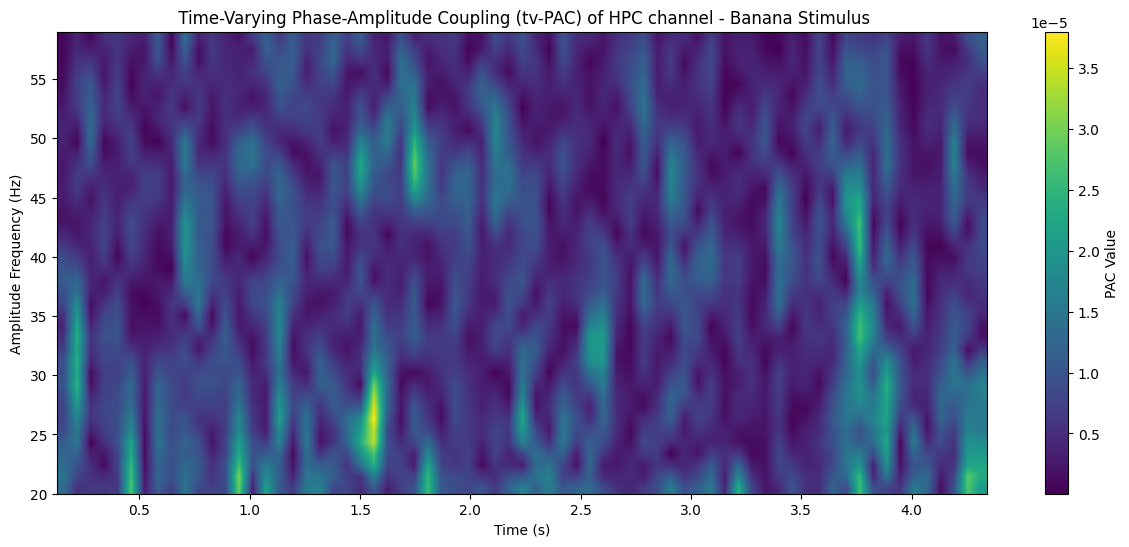

In [27]:
low_gamma_band, theta_band = [20, 60], [4, 8]
t_win = 0.25
overlap = 0.75
times, amp_freqs, pac_matrix = calc_tvPAC(erps['banana'][0], data['srate'], theta_band, low_gamma_band, t_win, overlap)

plt.figure(figsize=(15, 6))
extent = [times[0], times[-1], amp_freqs[0], amp_freqs[-1]]
plt.imshow(pac_matrix, aspect='auto', extent=extent, origin='lower', cmap='viridis', interpolation='bilinear')
plt.colorbar(label='PAC Value')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude Frequency (Hz)')
plt.title(' Time-Varying Phase-Amplitude Coupling (tv-PAC) of HPC channel - Banana Stimulus')
plt.show()

# Bonus: Modulation Index (MI) `+10 Points`

The Mean Vector Length (MVL) is not the only method for calculating Phase-Amplitude Coupling (PAC); another alternative is the Modulation Index (MI). You can find a detailed explanation of this method in [this paper](https://doi.org/10.1073/pnas.0810524105).

Simply implement the MI method and compute the time-varying PAC (tv-PAC) for each channel (l-PAC) and between channels (ir-PAC) using **ERP signals**. Then, compare the results with the MVL method used in the previous section. *`7 Points`*

`Theoretical Question:` In [this paper](https://doi.org/10.3389/fnins.2019.00573), different methods for calculating PAC and PLV and Generalized-Linear-Modeling-Cross-Frequency-Coupling (GLM) are evaluated. After reading the paper, determine when we should use MVL or MI for calculating PAC. *`3 Points`*

Based on the comprehensive analysis presented in the academic paper provided, I have prepared a clear and concise guide on when to utilize Mean Vector Length (MVL) or Modulation Index (MI) for determining phase-amplitude coupling in neural data.

In situations where researchers are working with shorter or noisy data sets, Modulation Index (MI) is the recommended method. This technique is highly resilient in adverse conditions, making it ideal for experiments where data quality may be suboptimal. Moreover, MI is one of the few techniques capable of identifying biphasic coupling, which is vital for examining intricate neural dynamics that involve multiple phase interactions.

On the other hand, Mean Vector Length (MVL) is ideal for analyzing long-duration, high-quality data. It is extremely sensitive to changes in coupling strength and modulation width, enabling precise measurements in well-controlled experimental setups. MVL is most suitable for examining monophasic coupling, where a single phase of a lower-frequency wave modulates the amplitude of a higher-frequency oscillation.

For a more comprehensive understanding of neural interactions, it is advisable to use both MI and MVL in your analysis. This approach capitalizes on the strengths of each measure and offers a richer interpretation of your data, particularly in complex experimental setups.

In [28]:
def calc_MI(data, srate, fph_range, famp_range):
    """
    Calculate the Modulation Index for Phase-Amplitude Coupling.
    """
    phase = BPF_filter(data, fph_range[0], fph_range[1], srate, 3)
    amp = BPF_filter(data, famp_range[0], famp_range[1], srate, 3)

    phase = np.angle(sp.signal.hilbert(phase))
    amp = np.abs(sp.signal.hilbert(amp))

    num_bins = 18
    bins = np.linspace(-np.pi, np.pi, num_bins + 1)
    digitized = np.digitize(phase, bins) - 1 

    amp_distr = np.array([amp[digitized == i].mean() for i in range(num_bins)])
    amp_distr /= amp_distr.sum()

    uniform_distr = np.ones(num_bins) / num_bins
    MI = sp.stats.entropy(amp_distr, uniform_distr)

    return MI

def calc_PAC(data, famp_range, fph_range, srate):
    """
    Calculate the PAC using the Modulation Index method over specified amplitude and phase frequency ranges.
    """
    pac_values = np.zeros((len(famp_range), len(fph_range)))

    for low_index, fph_band in enumerate(fph_range):
        for high_index, famp_band in enumerate(famp_range):
            pac_values[high_index, low_index] = calc_MI(data, srate, fph_band, famp_band)

    return pac_values

In [29]:
famp_range = [(i, i + 1) for i in range(20, 60)]
fph_range = [(i, i + 1) for i in range(4, 8)]

pre_stimulus_erp = erps['banana'][0, 250:750]       # data of HPC channel 1 sec before stimulus (banana)
post_stimulus_erp = erps['banana'][0, 751:1251]     # data of HPC channel 1 sec after stimulus (banana)

hpc_pac_before_stimulus = calc_PAC(pre_stimulus_erp, famp_range, fph_range, data['srate'])
hpc_pac_after_stimulus = calc_PAC(post_stimulus_erp, famp_range, fph_range, data['srate'])
hpc_vmin = min(np.min(hpc_pac_before_stimulus), np.min(hpc_pac_after_stimulus))
hpc_vmax = max(np.max(hpc_pac_before_stimulus), np.max(hpc_pac_after_stimulus))

pre_stimulus_erp = erps['banana'][1, 250:750]       # data of OT channel 1 sec before stimulus (banana)
post_stimulus_erp = erps['banana'][1, 751:1251]     # data of OT channel 1 sec after stimulus (banana)

ot_pac_before_stimulus = calc_PAC(pre_stimulus_erp, famp_range, fph_range, data['srate'])
ot_pac_after_stimulus = calc_PAC(post_stimulus_erp, famp_range, fph_range, data['srate'])
ot_vmin = min(np.min(ot_pac_before_stimulus), np.min(ot_pac_after_stimulus))
ot_vmax = max(np.max(ot_pac_before_stimulus), np.max(ot_pac_after_stimulus))

pre_stimulus_erp = erps['banana'][2, 250:750]       # data of mPFC channel 1 sec before stimulus (banana)
post_stimulus_erp = erps['banana'][2, 751:1251]     # data of mPFC channel 1 sec after stimulus (banana)

mpfc_pac_before_stimulus = calc_PAC(pre_stimulus_erp, famp_range, fph_range, data['srate'])
mpfc_pac_after_stimulus = calc_PAC(post_stimulus_erp, famp_range, fph_range, data['srate'])
mpfc_vmin = min(np.min(mpfc_pac_before_stimulus), np.min(mpfc_pac_after_stimulus))
mpfc_vmax = max(np.max(mpfc_pac_before_stimulus), np.max(mpfc_pac_after_stimulus))

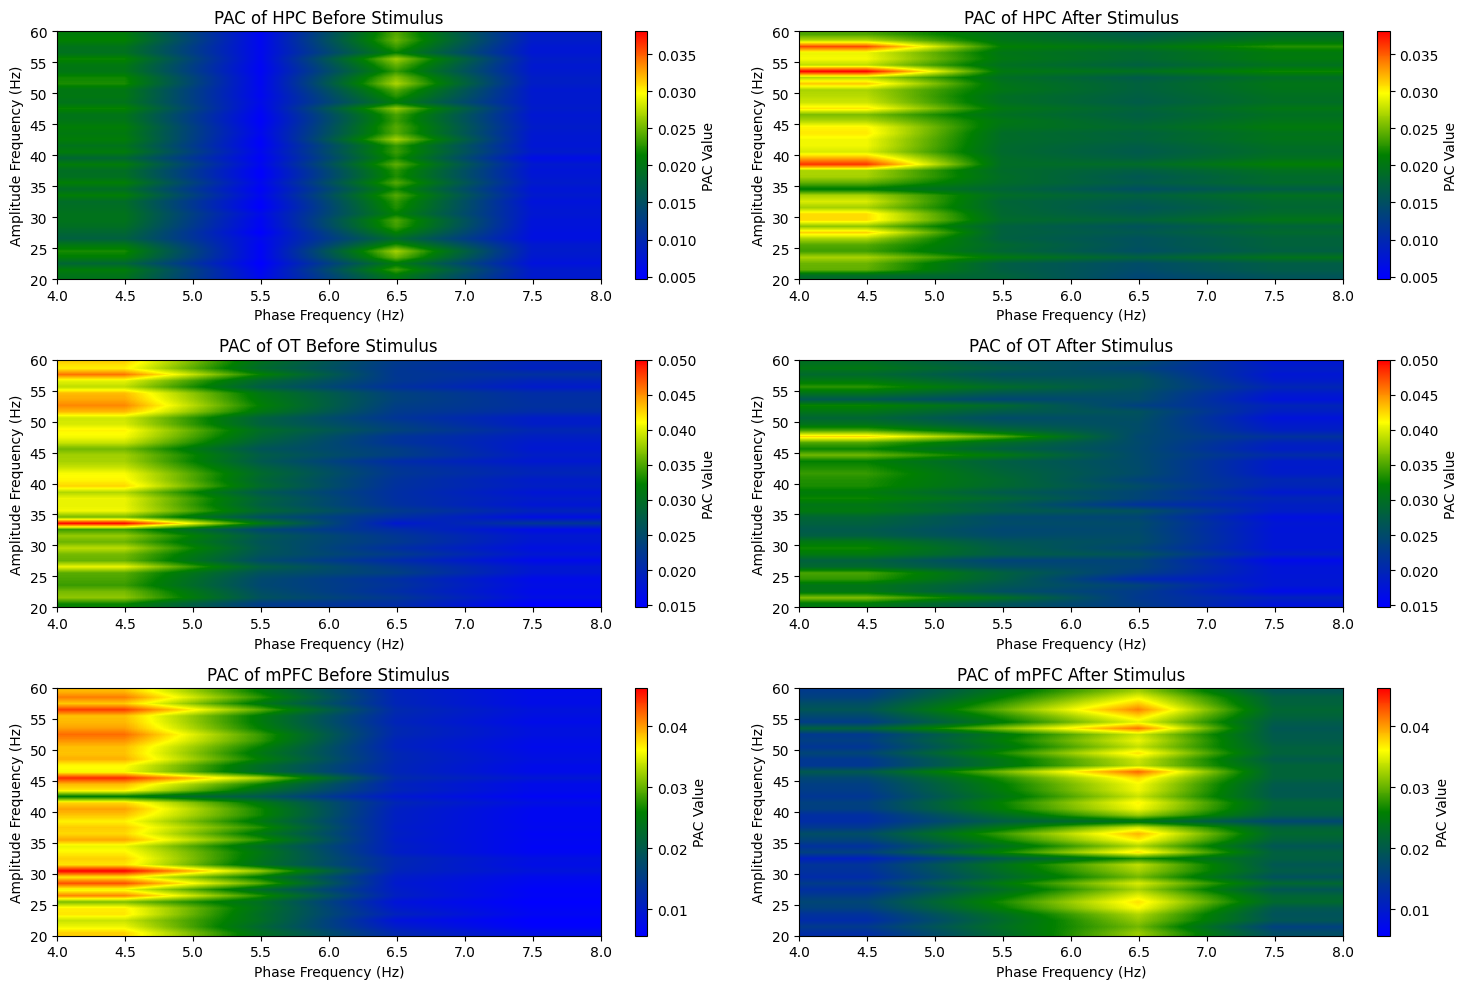

In [30]:
plt.figure(figsize=(15, 10))

# PAC before stimulus (HPC)
plt.subplot(3, 2, 1)  
img = plt.imshow(hpc_pac_before_stimulus, origin='lower', aspect='auto',
                 extent=[theta_band[0], theta_band[1], low_gamma_band[0], low_gamma_band[1]],
                 vmin=hpc_vmin, vmax=hpc_vmax, cmap=cmap, interpolation='bilinear')
plt.colorbar(img, label='PAC Value')
plt.xlabel('Phase Frequency (Hz)')
plt.ylabel('Amplitude Frequency (Hz)')
plt.title('PAC of HPC Before Stimulus')

# PAC after stimulus (HPC)
plt.subplot(3, 2, 2)
img = plt.imshow(hpc_pac_after_stimulus, origin='lower', aspect='auto',
                 extent=[theta_band[0], theta_band[1], low_gamma_band[0], low_gamma_band[1]],
                 vmin=hpc_vmin, vmax=hpc_vmax, cmap=cmap, interpolation='bilinear')
plt.colorbar(img, label='PAC Value')
plt.xlabel('Phase Frequency (Hz)')
plt.ylabel('Amplitude Frequency (Hz)')
plt.title('PAC of HPC After Stimulus')

# PAC before stimulus (OT)
plt.subplot(3, 2, 3)
img = plt.imshow(ot_pac_before_stimulus, origin='lower', aspect='auto',
                 extent=[theta_band[0], theta_band[1], low_gamma_band[0], low_gamma_band[1]],
                 vmin=ot_vmin, vmax=ot_vmax, cmap=cmap, interpolation='bilinear')
plt.colorbar(img, label='PAC Value')
plt.xlabel('Phase Frequency (Hz)')
plt.ylabel('Amplitude Frequency (Hz)')
plt.title('PAC of OT Before Stimulus')

# PAC after stimulus (OT)
plt.subplot(3, 2, 4)
img = plt.imshow(ot_pac_after_stimulus, origin='lower', aspect='auto',
                 extent=[theta_band[0], theta_band[1], low_gamma_band[0], low_gamma_band[1]],
                 vmin=ot_vmin, vmax=ot_vmax, cmap=cmap, interpolation='bilinear')
plt.colorbar(img, label='PAC Value')
plt.xlabel('Phase Frequency (Hz)')
plt.ylabel('Amplitude Frequency (Hz)')
plt.title('PAC of OT After Stimulus')

# PAC before stimulus (mPFC)
plt.subplot(3, 2, 5)
img = plt.imshow(mpfc_pac_before_stimulus, origin='lower', aspect='auto',
                 extent=[theta_band[0], theta_band[1], low_gamma_band[0], low_gamma_band[1]],
                 vmin=mpfc_vmin, vmax=mpfc_vmax, cmap=cmap, interpolation='bilinear')
plt.colorbar(img, label='PAC Value')
plt.xlabel('Phase Frequency (Hz)')
plt.ylabel('Amplitude Frequency (Hz)')
plt.title('PAC of mPFC Before Stimulus')

# PAC after stimulus (mPFC)
plt.subplot(3, 2, 6)
img = plt.imshow(mpfc_pac_after_stimulus, origin='lower', aspect='auto',
                 extent=[theta_band[0], theta_band[1], low_gamma_band[0], low_gamma_band[1]],
                 vmin=mpfc_vmin, vmax=mpfc_vmax, cmap=cmap, interpolation='bilinear')
plt.colorbar(img, label='PAC Value')
plt.xlabel('Phase Frequency (Hz)')
plt.ylabel('Amplitude Frequency (Hz)')
plt.title('PAC of mPFC After Stimulus')

plt.tight_layout()
plt.show()